[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


C:\Users\Michael\AppData\Local\Temp\ipykernel_21536\1331390846.py:21: RuntimeWarning: divide by zero encountered in divide
  return pKa+np.log10(base/acid)
C:\Users\Michael\AppData\Local\Temp\ipykernel_21536\1331390846.py:21: RuntimeWarning: divide by zero encountered in log10
  return pKa+np.log10(base/acid)
C:\Users\Michael\AppData\Local\Temp\ipykernel_21536\1331390846.py:13: RuntimeWarning: divide by zero encountered in divide
  return V_CH3COO/V_CH3COOH


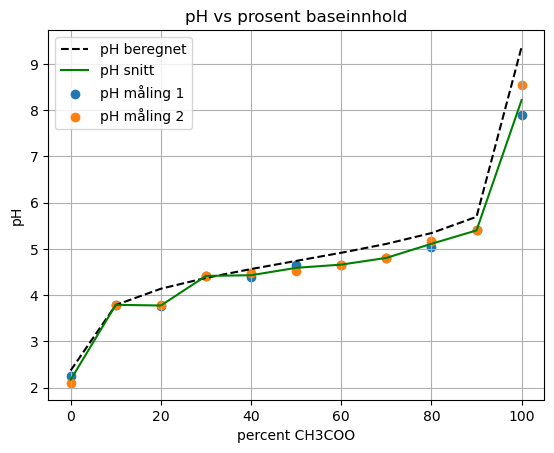

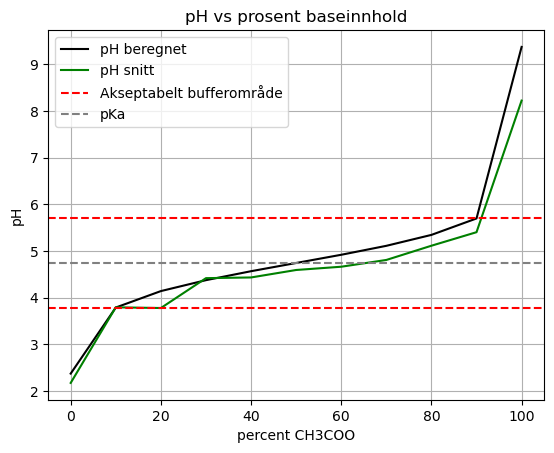

,V_CH3COO,V_CH3COOH,relative_strength,percent_CH3COO,pH beregnet,pH målt1,pH målt2,pH average
0,0.0,5.0,0.000000,0.0,2.370000,2.24,2.10,2.170
1,0.5,4.5,0.111111,10.0,3.785757,3.79,3.79,3.790
2,1.0,4.0,0.250000,20.0,4.137940,3.77,3.78,3.775
3,1.5,3.5,0.428571,30.0,4.372023,4.41,4.42,4.415
4,2.0,3.0,0.666667,40.0,4.563909,4.39,4.47,4.430
5,2.5,2.5,1.000000,50.0,4.740000,4.65,4.53,4.590
6,3.0,2.0,1.500000,60.0,4.916091,4.66,4.66,4.660
7,3.5,1.5,2.333333,70.0,5.107977,4.81,4.80,4.805
8,4.0,1.0,4.000000,80.0,5.342060,5.05,5.17,5.110
9,4.5,0.5,9.000000,90.0,5.694243,5.40,5.40,5.400


In [28]:
import numpy as np
import pandas as pd

V_CH3COO = np.arange(0,5.5,0.5)
V_CH3COOH = np.linspace(5,0,11)

pH_målt1 = np.array((2.24, 3.79, 3.77,4.41,4.39, 4.65, 4.66, 4.81, 5.05, 5.40, 7.89))
pH_målt2 = np.array((2.10, 3.79, 3.78,4.42,4.47, 4.53, 4.66, 4.80, 5.17, 5.40, 8.55))

pH_avergae = (pH_målt1+pH_målt2)/2

def relative_strength(V_CH3COO, V_CH3COOH):
    return V_CH3COO/V_CH3COOH

def percent_CH3COO(V_CH3COO, V_CH3COOH):
    return V_CH3COO/(V_CH3COO+V_CH3COOH)*100

def pH(base, acid):
    pKa = 4.74
    try:
        return pKa+np.log10(base/acid)
    except:
        return np.nan

print(V_CH3COO)
print(V_CH3COOH)

pH_beregnet = pH(V_CH3COO, V_CH3COOH)
pH_beregnet[0], pH_beregnet[-1] = 2.37, 9.37

df = pd.DataFrame({'V_CH3COO': V_CH3COO, 
                   'V_CH3COOH': V_CH3COOH, 
                   'relative_strength': relative_strength(V_CH3COO, V_CH3COOH), 
                   'percent_CH3COO': percent_CH3COO(V_CH3COO, V_CH3COOH),
                   'pH beregnet': pH_beregnet,
                   'pH målt1': pH_målt1,
                   'pH målt2': pH_målt2,
                   'pH average': pH_avergae})

df

# we want to plot the pH beregnet and pH snitt against the percent CH3COO

import matplotlib.pyplot as plt

plt.plot(df['percent_CH3COO'], df['pH beregnet'], label='pH beregnet', linestyle='--', color='black')
plt.plot(df['percent_CH3COO'], df['pH average'], label='pH snitt', linestyle='-', color='green')
plt.scatter(df['percent_CH3COO'], df['pH målt1'], label='pH måling 1')
plt.scatter(df['percent_CH3COO'], df['pH målt2'], label='pH måling 2')
plt.xlabel('percent CH3COO')
plt.ylabel('pH')
plt.grid()
plt.legend()
plt.title('pH vs prosent baseinnhold')
plt.savefig('pH_vs_prosent_baseinnhold.png',dpi=512)
plt.show()


plt.plot(df['percent_CH3COO'], df['pH beregnet'], label='pH beregnet', linestyle='-', color='black')
plt.plot(df['percent_CH3COO'], df['pH average'], label='pH snitt', linestyle='-', color='green')
# we want to add lines showing what pH range the solution can be used as a buffer
plt.axhline(pH_beregnet[1], color='red', linestyle='--', label='Akseptabelt bufferområde')
plt.axhline(pH_beregnet[-2], color='red', linestyle='--')
plt.axhline(4.74, color='gray', linestyle='--', label='pKa')
plt.xlabel('percent CH3COO')
plt.ylabel('pH')
plt.grid()
plt.legend()
plt.title('pH vs prosent baseinnhold')
plt.savefig('oppgave18.png',dpi=512)
plt.show()


df